****============================GRAPH PREPROCESSING============================**


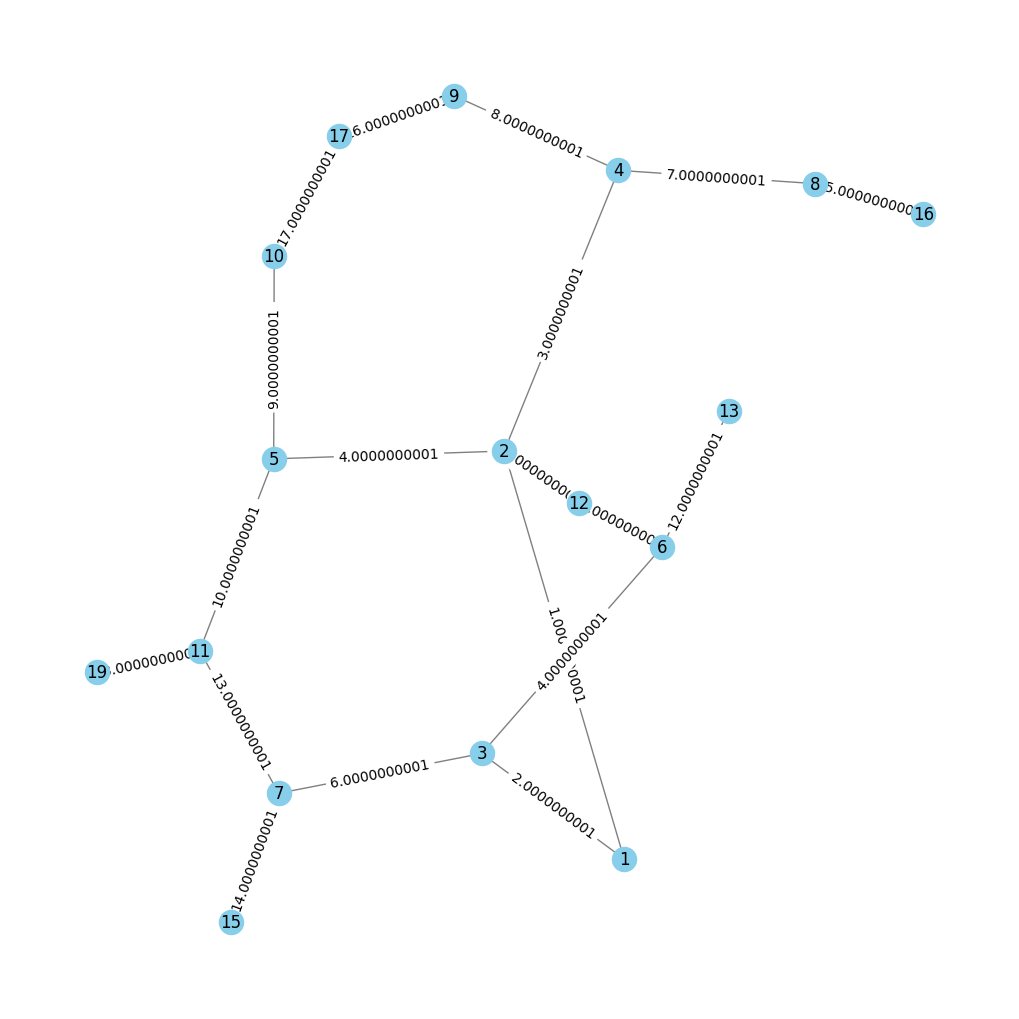

In [88]:
# Example usage
import networkx as nx
import matplotlib.pyplot as plt


# Define the Edge class
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight


def preprocess_graph(G):
    # assuming 'weight' is the name of the attribute for edge weights
    return dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))


num_nodes = 10

# Define a small fraction
epsilon = 1e-10

# Generate edges with unique weights
edges = [
    Edge(1, 2, 1 + epsilon),
    Edge(1, 3, 2 + epsilon),
    Edge(2, 4, 3 + epsilon),
    Edge(2, 5, 4 + epsilon),
    Edge(3, 6, 4 + epsilon),
    Edge(3, 7, 6 + epsilon),
    Edge(4, 8, 7 + epsilon),
    Edge(4, 9, 8 + epsilon),
    Edge(5, 10, 9 + epsilon),
    Edge(5, 11, 10 + epsilon),
    Edge(6, 12, 11 + epsilon),
    Edge(6, 13, 12 + epsilon),
    Edge(7, 11, 13 + epsilon),
    Edge(7, 15, 14 + epsilon),
    Edge(8, 16, 15 + epsilon),
    Edge(9, 17, 16 + epsilon),
    Edge(10, 17, 17 + epsilon),
    Edge(11, 19, 18 + epsilon),
    Edge(12, 2, 19 + epsilon),
]
G = nx.Graph()
# Convert Edge objects to tuples
G.add_weighted_edges_from((e.u, e.v, e.weight) for e in edges)

# Preprocess the graph
D = preprocess_graph(G)

# Create a new figure with a larger size
plt.figure(figsize=(10, 10))

# Draw the graph using the spring_layout
pos = nx.spring_layout(G)
nx.draw(
    G, pos, with_labels=True, node_color="skyblue", node_size=300, edge_color="gray"
)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()
# print(D)

=================================== Distance Oracle =====================================


In [89]:
class DistanceOracle:
    def __init__(self, distances=None):
        if distances is None:
            self.data = {}
        else:
            self.data = distances

    def get_distance(self, u, v):
        return self.data.get(u, {}).get(v, float("inf"))

    def __getitem__(self, key):
        return self.data[key]

    def add_distance(self, u, v, distance):
        if u not in self.data:
            self.data[u] = {}
        self.data[u][v] = distance
    
    def add_edge(u, v, weight):
        G.add_edge(u, v, weight=weight)
    def get_edge_weight(G, u, v):
        if G.has_edge(u, v):
            return G[u][v]['weight']
        else:
            return None

In [90]:
# Create an instance of 
distance_oracle = DistanceOracle(D)


**---------------------------------SHORTEST PATH function and Store-------------------------------

In [91]:
def store_shortest_paths(G):
    shortest_paths = {}
    for u in G.nodes:
        for v in G.nodes:
            if u == v:
                shortest_paths[(u, v)] = [u]
            else:
                shortest_paths[(u, v)] = nx.shortest_path(G, u, v, weight='weight')
    return shortest_paths

shortest_paths = store_shortest_paths(G)

# Now you can access the shortest path between any pair of nodes like this:
print(shortest_paths[(13, 19)])
print(shortest_paths)

[13, 6, 3, 1, 2, 5, 11, 19]
{(1, 1): [1], (1, 2): [1, 2], (1, 3): [1, 3], (1, 4): [1, 2, 4], (1, 5): [1, 2, 5], (1, 6): [1, 3, 6], (1, 7): [1, 3, 7], (1, 8): [1, 2, 4, 8], (1, 9): [1, 2, 4, 9], (1, 10): [1, 2, 5, 10], (1, 11): [1, 2, 5, 11], (1, 12): [1, 3, 6, 12], (1, 13): [1, 3, 6, 13], (1, 15): [1, 3, 7, 15], (1, 16): [1, 2, 4, 8, 16], (1, 17): [1, 2, 4, 9, 17], (1, 19): [1, 2, 5, 11, 19], (2, 1): [2, 1], (2, 2): [2], (2, 3): [2, 1, 3], (2, 4): [2, 4], (2, 5): [2, 5], (2, 6): [2, 1, 3, 6], (2, 7): [2, 1, 3, 7], (2, 8): [2, 4, 8], (2, 9): [2, 4, 9], (2, 10): [2, 5, 10], (2, 11): [2, 5, 11], (2, 12): [2, 1, 3, 6, 12], (2, 13): [2, 1, 3, 6, 13], (2, 15): [2, 1, 3, 7, 15], (2, 16): [2, 4, 8, 16], (2, 17): [2, 4, 9, 17], (2, 19): [2, 5, 11, 19], (3, 1): [3, 1], (3, 2): [3, 1, 2], (3, 3): [3], (3, 4): [3, 1, 2, 4], (3, 5): [3, 1, 2, 5], (3, 6): [3, 6], (3, 7): [3, 7], (3, 8): [3, 1, 2, 4, 8], (3, 9): [3, 1, 2, 4, 9], (3, 10): [3, 1, 2, 5, 10], (3, 11): [3, 1, 2, 5, 11], (3, 12): [3, 6, 12

---------------------------------POWER_OF_2 FUNCTION--------------------------------


In [92]:
import math


def nearest_power_of_2(x):
    if x <= 0:
        return 1  # Return 1 for non-positive input
    elif math.isinf(x):
        return float('inf')  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

--------------------------------FIND_JUMP FUNCTION--------------------------------


In [93]:
def FINDJUMP(P, F):
    X = []  # Initialize X with s
    x = P[0]

    X.append(x)
    # F = list(F)

    u = min(F, key=lambda v: nearest_power_of_2(
        distance_oracle.get_distance(x, v)))

    # print(u)

    while True:

        # Find y, the first vertex on P[x, t] at distance >= max{1, (xu)^2} from x
        distance = max(1, nearest_power_of_2(
            distance_oracle.get_distance(x, u)))
        # print(distance)
        y = None
        for vertex in P[P.index(x)+1:]:
            if distance_oracle.get_distance(x, vertex) >= distance:
                y = vertex
                break

        if y is not None:
            X.append(y)
            x = y
        else:
            break

    return X

In [94]:
m = FINDJUMP([13, 6, 3, 7, 11, 19], {6, 3})
print(m)
# print(nearest_power_of_2(37))

[13, 6, 3, 7, 11, 19]


**------------------------------MAXIMIZER FUNCTION--------------------------------
**

In [95]:
def get_edge_weight(G, u, v):
    if G.has_edge(u, v):
        return G[u][v]['weight']
    else:
        return None

In [96]:
import networkx as nx


def maximizer(x, y, d1, d2):

    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    # xy_distance = distance_oracle.get_distance(x, y)
    # make the set of edges in xy path
    if nx.has_path(G, x, y):
        # Get the path and its length
        path = shortest_paths[(x, y)]
        print(path)
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edge = (u, v)
            edges_set.add(edge)
    print(edges_set)
    # check max edges in edge list
    for u, v in edges_set:

        # Check if the distance from x to the edge and y to the edge are at least d1 and d2
        if (
            nx.has_path(G, x, u)
            and nx.has_path(G, y, v)
            and distance_oracle.get_distance(x, u) >= d1
            and distance_oracle.get_distance(y, v) >= d2
            # or (distance_oracle.get_distance(x, u) >= d2
            # and distance_oracle.get_distance(y, v) >= d1)
        ):

            max_edge1 = (u, v)
            max_edges.add(max_edge1)

    print(max_edges)

    for u, v in max_edges:

        max_xy_distance = float('-inf')
        # Remove the (u, v) edge
        original_weight = get_edge_weight(G,u, v)
        # print(original_weight)
        
        G.remove_edge(u, v)

        # Calculate the xy path distance
        D = preprocess_graph(G)
        distance_oracle_new = DistanceOracle(D)

        xy_path = nx.shortest_path(G, x, y)
        # print(xy_path)

        max_uv_distance = distance_oracle_new.get_distance(x, y)
        if (max_uv_distance >= max_xy_distance):
            # max_xy_distance = max_uv_distance
            max_xy_edge = (u, v)
            max_xy_path = xy_path

        # Add the (u, v) edge back to the graph
        G.add_weighted_edges_from([(u, v, original_weight)])
        D = preprocess_graph(G)
    # distance_oracle=DistanceOracle(D)

    return max_xy_edge, max_xy_path

In [97]:
maximizer(13, 19, 16, 32)

[13, 6, 3, 1, 2, 5, 11, 19]
{(1, 2), (5, 11), (3, 1), (11, 19), (2, 5), (13, 6), (6, 3)}
{(3, 1), (1, 2)}


((1, 2), [13, 6, 3, 7, 11, 19])

**================================USER INPUT =================================
**

In [98]:
# print(shortest_path(G, 13, 19))

In [99]:
# Get user input for source and destination vertices

s, t = map(int, input("Enter source and destination vertices (s t): ").split())
e_u, e_v = map(
    int, input("Enter the edge to avoid and its weight (u v): ").split()
)


# Create an Edge object for the edge to avoid
e = Edge(e_u, e_v, distance_oracle.get_distance(e_u, e_v))

In [100]:
# D = preprocess_graph(G)
# distance_oracle = DistanceOracle(D)
# st_path = shortest_path(G, s, t)
# # print(G)
# ts_path = shortest_path(G, t, s)
# print("Shortest path from s to t:", st_path)

# print("Shortest path from t to s:", ts_path)

===============================MAIN: QUERY FUNCTION====================================


In [101]:
def is_valid_path(G, path):
    return all(G.has_edge(path[i], path[i+1]) for i in range(len(path) - 1))


def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result


def QUERY(s, t, e):
    # print(f"st_path={st_path}, ts_path={ts_path}")
    # print(f"Running QUERY with s={s}, t={t}, e={e}, E={E}")
    JUMP_st = FINDJUMP(shortest_paths[(s, t)] , {e.u, e.v})
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], {e.u, e.v})

    print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")

    final_shortest_path = []

    shortest_path_distance = float("inf")

    for x in JUMP_st:
        for y in JUMP_ts:

            print(x, y)

            d1 = nearest_power_of_2(distance_oracle.get_distance(x, e.u))
            d2 = nearest_power_of_2(distance_oracle.get_distance(y, e.v))

            # print(d1, d2)
            print(f"d1={d1}, d2={d2}")
            e_star, xy_e_star = maximizer(x, y, d1, d2)
            print(f"e_star={e_star}, xy_e_star={xy_e_star}")

            if xy_e_star is None:
                xy_e_star = []

            sx_path = shortest_paths[(s, x)]
            if sx_path is None:
                sx_path = []
            print(f"sx_path={sx_path}")

            yt_path = shortest_paths[(y, t)]
            if yt_path is None:
                yt_path = []

            print(f"yt_path={yt_path}")

            # sx_path = remove_duplicates(sx_path)
            # xy_e_star = remove_duplicates(xy_e_star)
            # yt_path = remove_duplicates(yt_path)

            P = remove_duplicates(sx_path + xy_e_star + yt_path)
            if is_valid_path(G, P):
                P = P
            else:
                P = []

            print(f"P={P}")

            if P != []:
                p_distance = sum(distance_oracle.get_distance(
                    P[i], P[i+1]) for i in range(len(P)-1))
                print(f"p_distance={p_distance}")
            else:
                p_distance = float('inf')

            # Check if e.u and e.v are not in P and the distance of P is shorter than the current shortest path

            if (e.u not in P or e.v not in P) and P != []:
                if p_distance < shortest_path_distance:
                    final_shortest_path = P
                    # print(f"shortest_path1={shortest_path1}")
                    shortest_path_distance = p_distance
            # print(f"shortest_path1={shortest_path1}")

    return final_shortest_path, shortest_path_distance

==================================== FINAL OUTPUT =================================


In [102]:


# Call the QUERY function with the instance of DistanceOracle

path = QUERY(s, t, e)


print(path)

JUMP_st=[13, 3, 1, 2, 5, 11, 19], JUMP_ts=[19, 11, 5, 2, 6, 13]
13 19
d1=16, d2=16
[13, 6, 3, 1, 2, 5, 11, 19]
{(1, 2), (5, 11), (3, 1), (11, 19), (2, 5), (13, 6), (6, 3)}
{(3, 1), (2, 5), (1, 2), (5, 11)}
e_star=(5, 11), xy_e_star=[13, 6, 3, 7, 11, 19]
sx_path=[13]
yt_path=[19]
P=[13, 6, 3, 7, 11, 19]
p_distance=53.000000000499995
13 11
d1=16, d2=8
[13, 6, 3, 1, 2, 5, 11]
{(1, 2), (5, 11), (3, 1), (2, 5), (13, 6), (6, 3)}
{(3, 1), (1, 2), (2, 5)}
e_star=(2, 5), xy_e_star=[13, 6, 3, 7, 11]
sx_path=[13]
yt_path=[11, 19]
P=[13, 6, 3, 7, 11, 19]
p_distance=53.000000000499995
13 5
d1=16, d2=1
[13, 6, 3, 1, 2, 5]
{(1, 2), (3, 1), (2, 5), (13, 6), (6, 3)}
{(3, 1), (1, 2)}
e_star=(1, 2), xy_e_star=[13, 6, 12, 2, 5]
sx_path=[13]
yt_path=[5, 11, 19]
P=[13, 6, 12, 2, 5, 11, 19]
p_distance=73.0000000009
13 2
d1=16, d2=4
[13, 6, 3, 1, 2]
{(3, 1), (1, 2), (6, 3), (13, 6)}
set()
e_star=None, xy_e_star=None
sx_path=[13]
yt_path=[2, 5, 11, 19]
P=[]
13 6
d1=16, d2=8
[13, 6]
{(13, 6)}
set()
e_star=None,